Making sure the transition to plot/create days/trials goes well.

**Left off**: trying to use multiplot_multi_day_summary here before integrating it into the main notebookes for mice and rats. After that, this notebook can be claned up. plot_days_info can remove the multi plot & DMS2_multiday_plots can be removed.


In [1]:
from plot_days_info import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from multiplot_summaries import multiplot_multi_day_summary

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-07-28 15:36:33,773][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-07-28 15:36:34,105][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
trials_df = pd.read_csv(
    "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/offline/trials_df.csv"
)
days_df = pd.read_csv(
    "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R01s_days_df.csv"
)
tdf = trials_df.query("animal_id == 'R013'").copy()
ddf = days_df.query("animal_id =='R013'").copy()

In [3]:
animal_id = "R013"

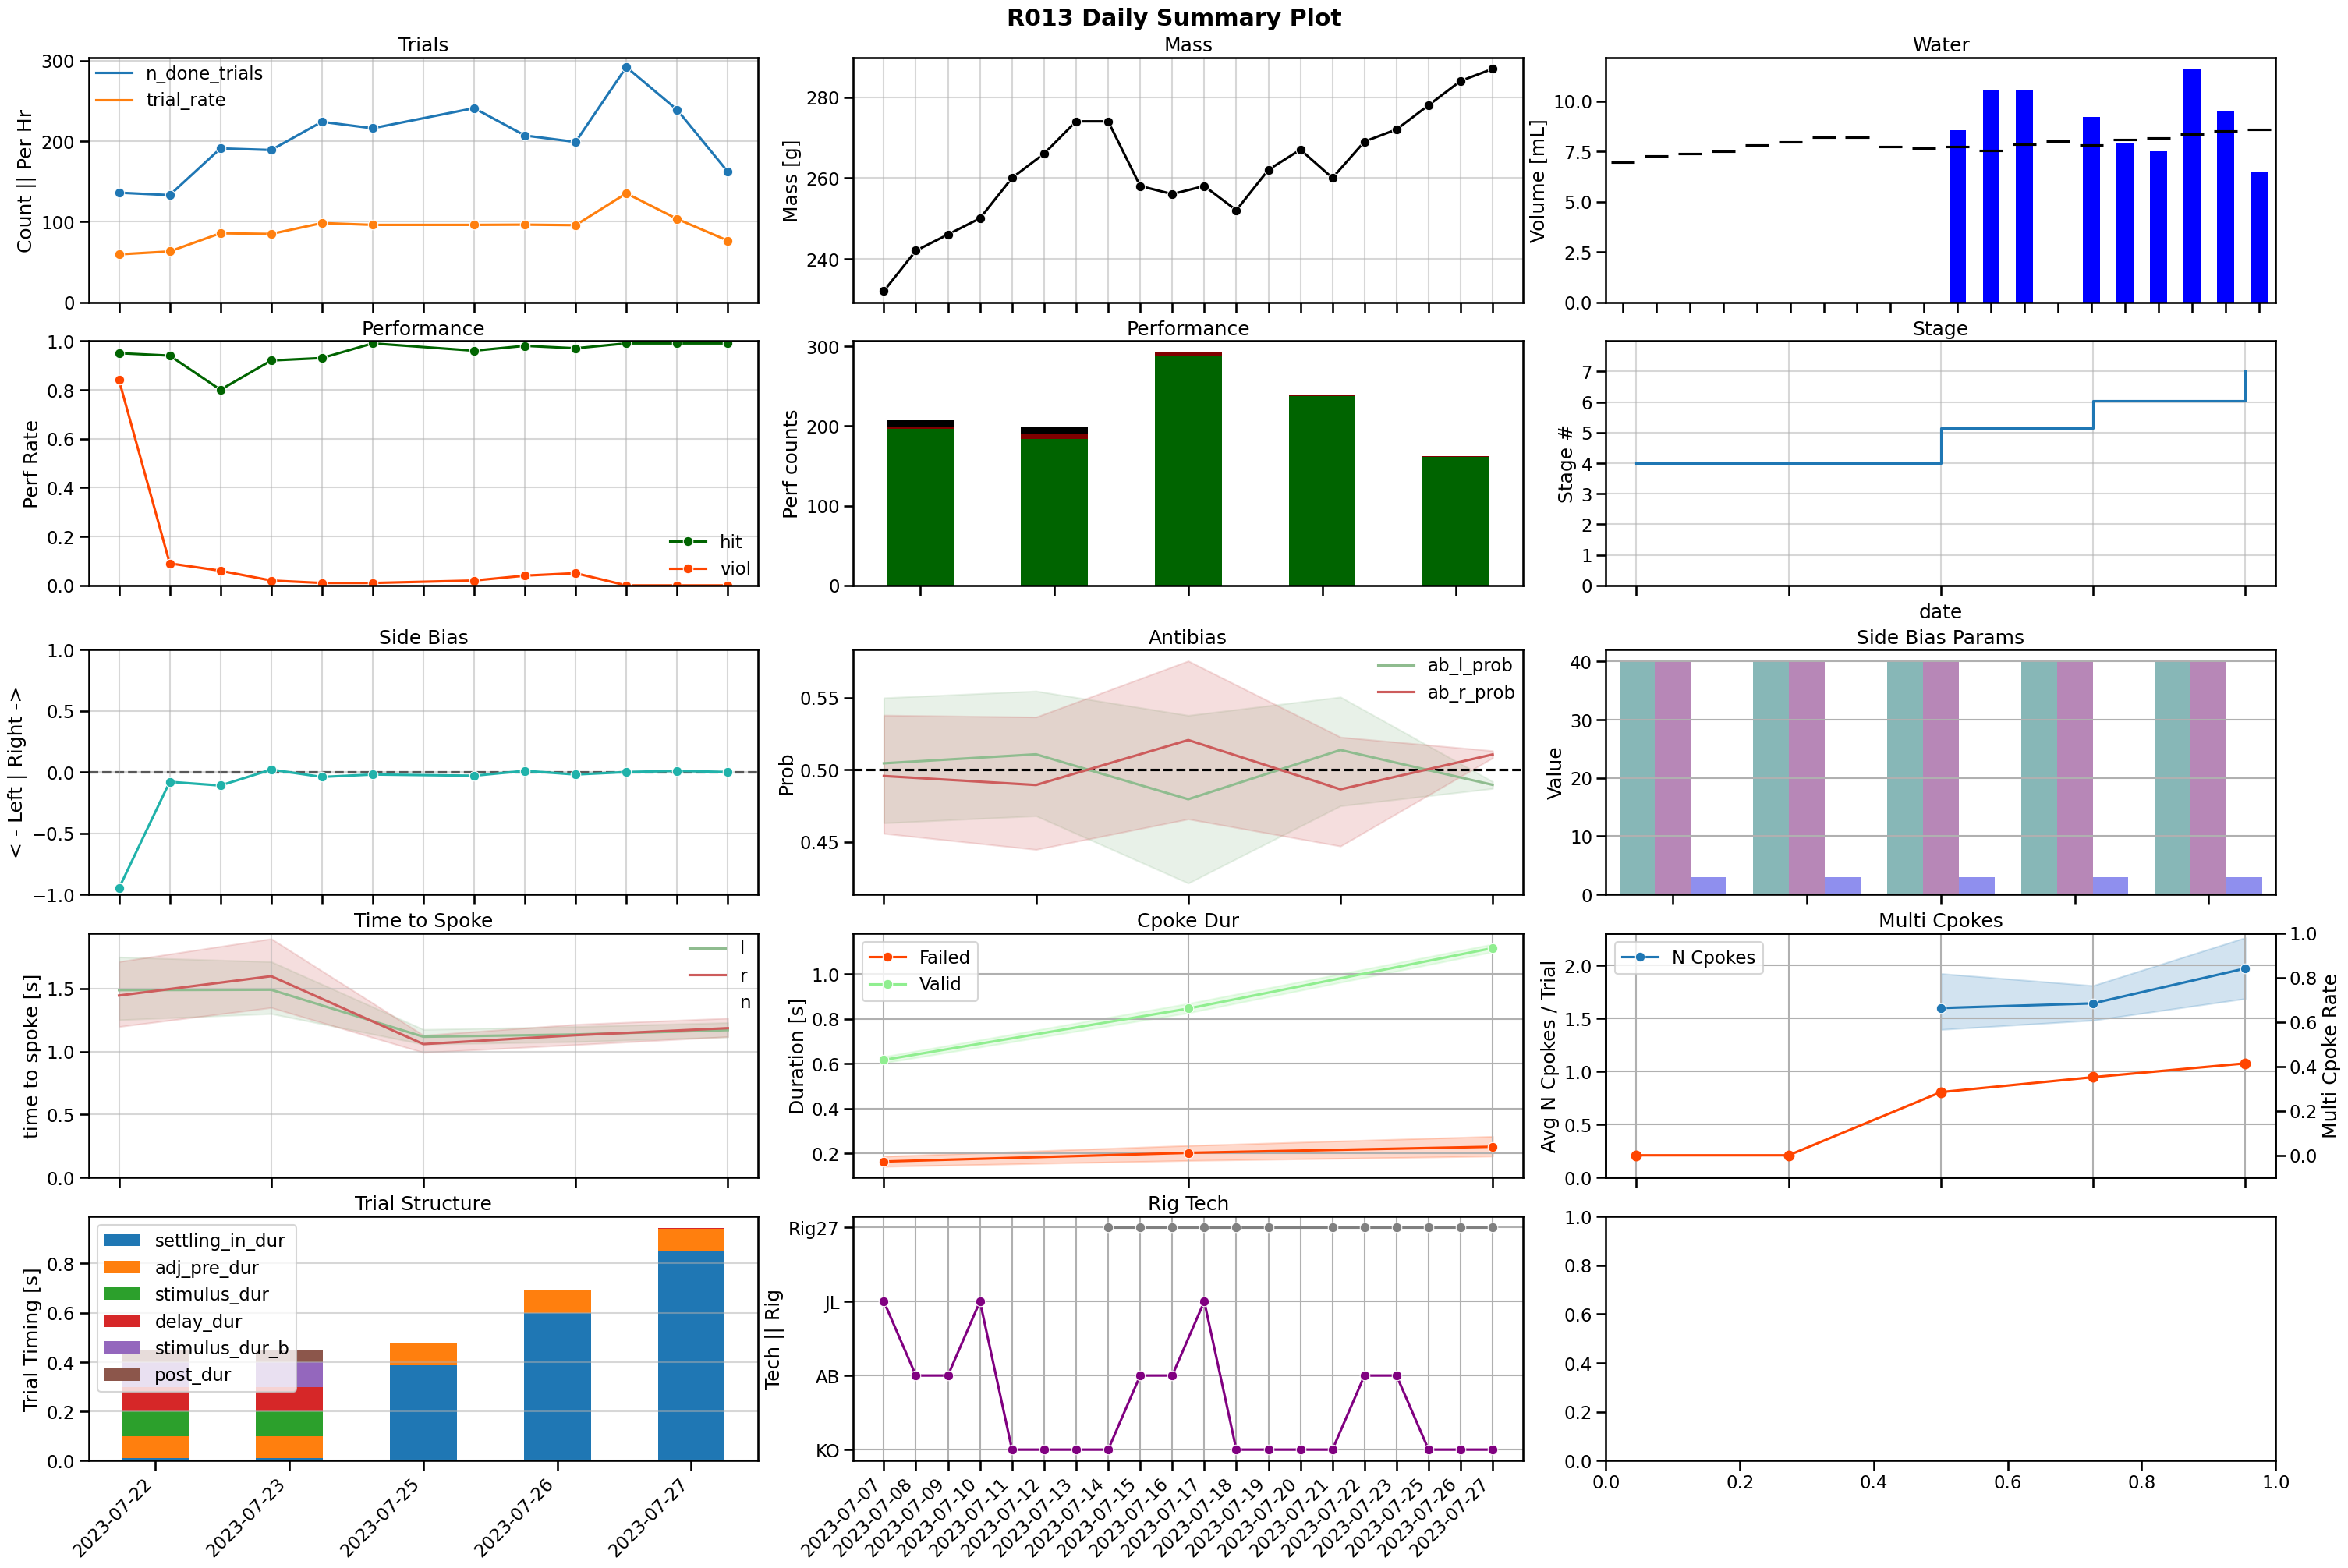

In [4]:
multiplot_multi_day_summary("R013", days_df, trials_df)

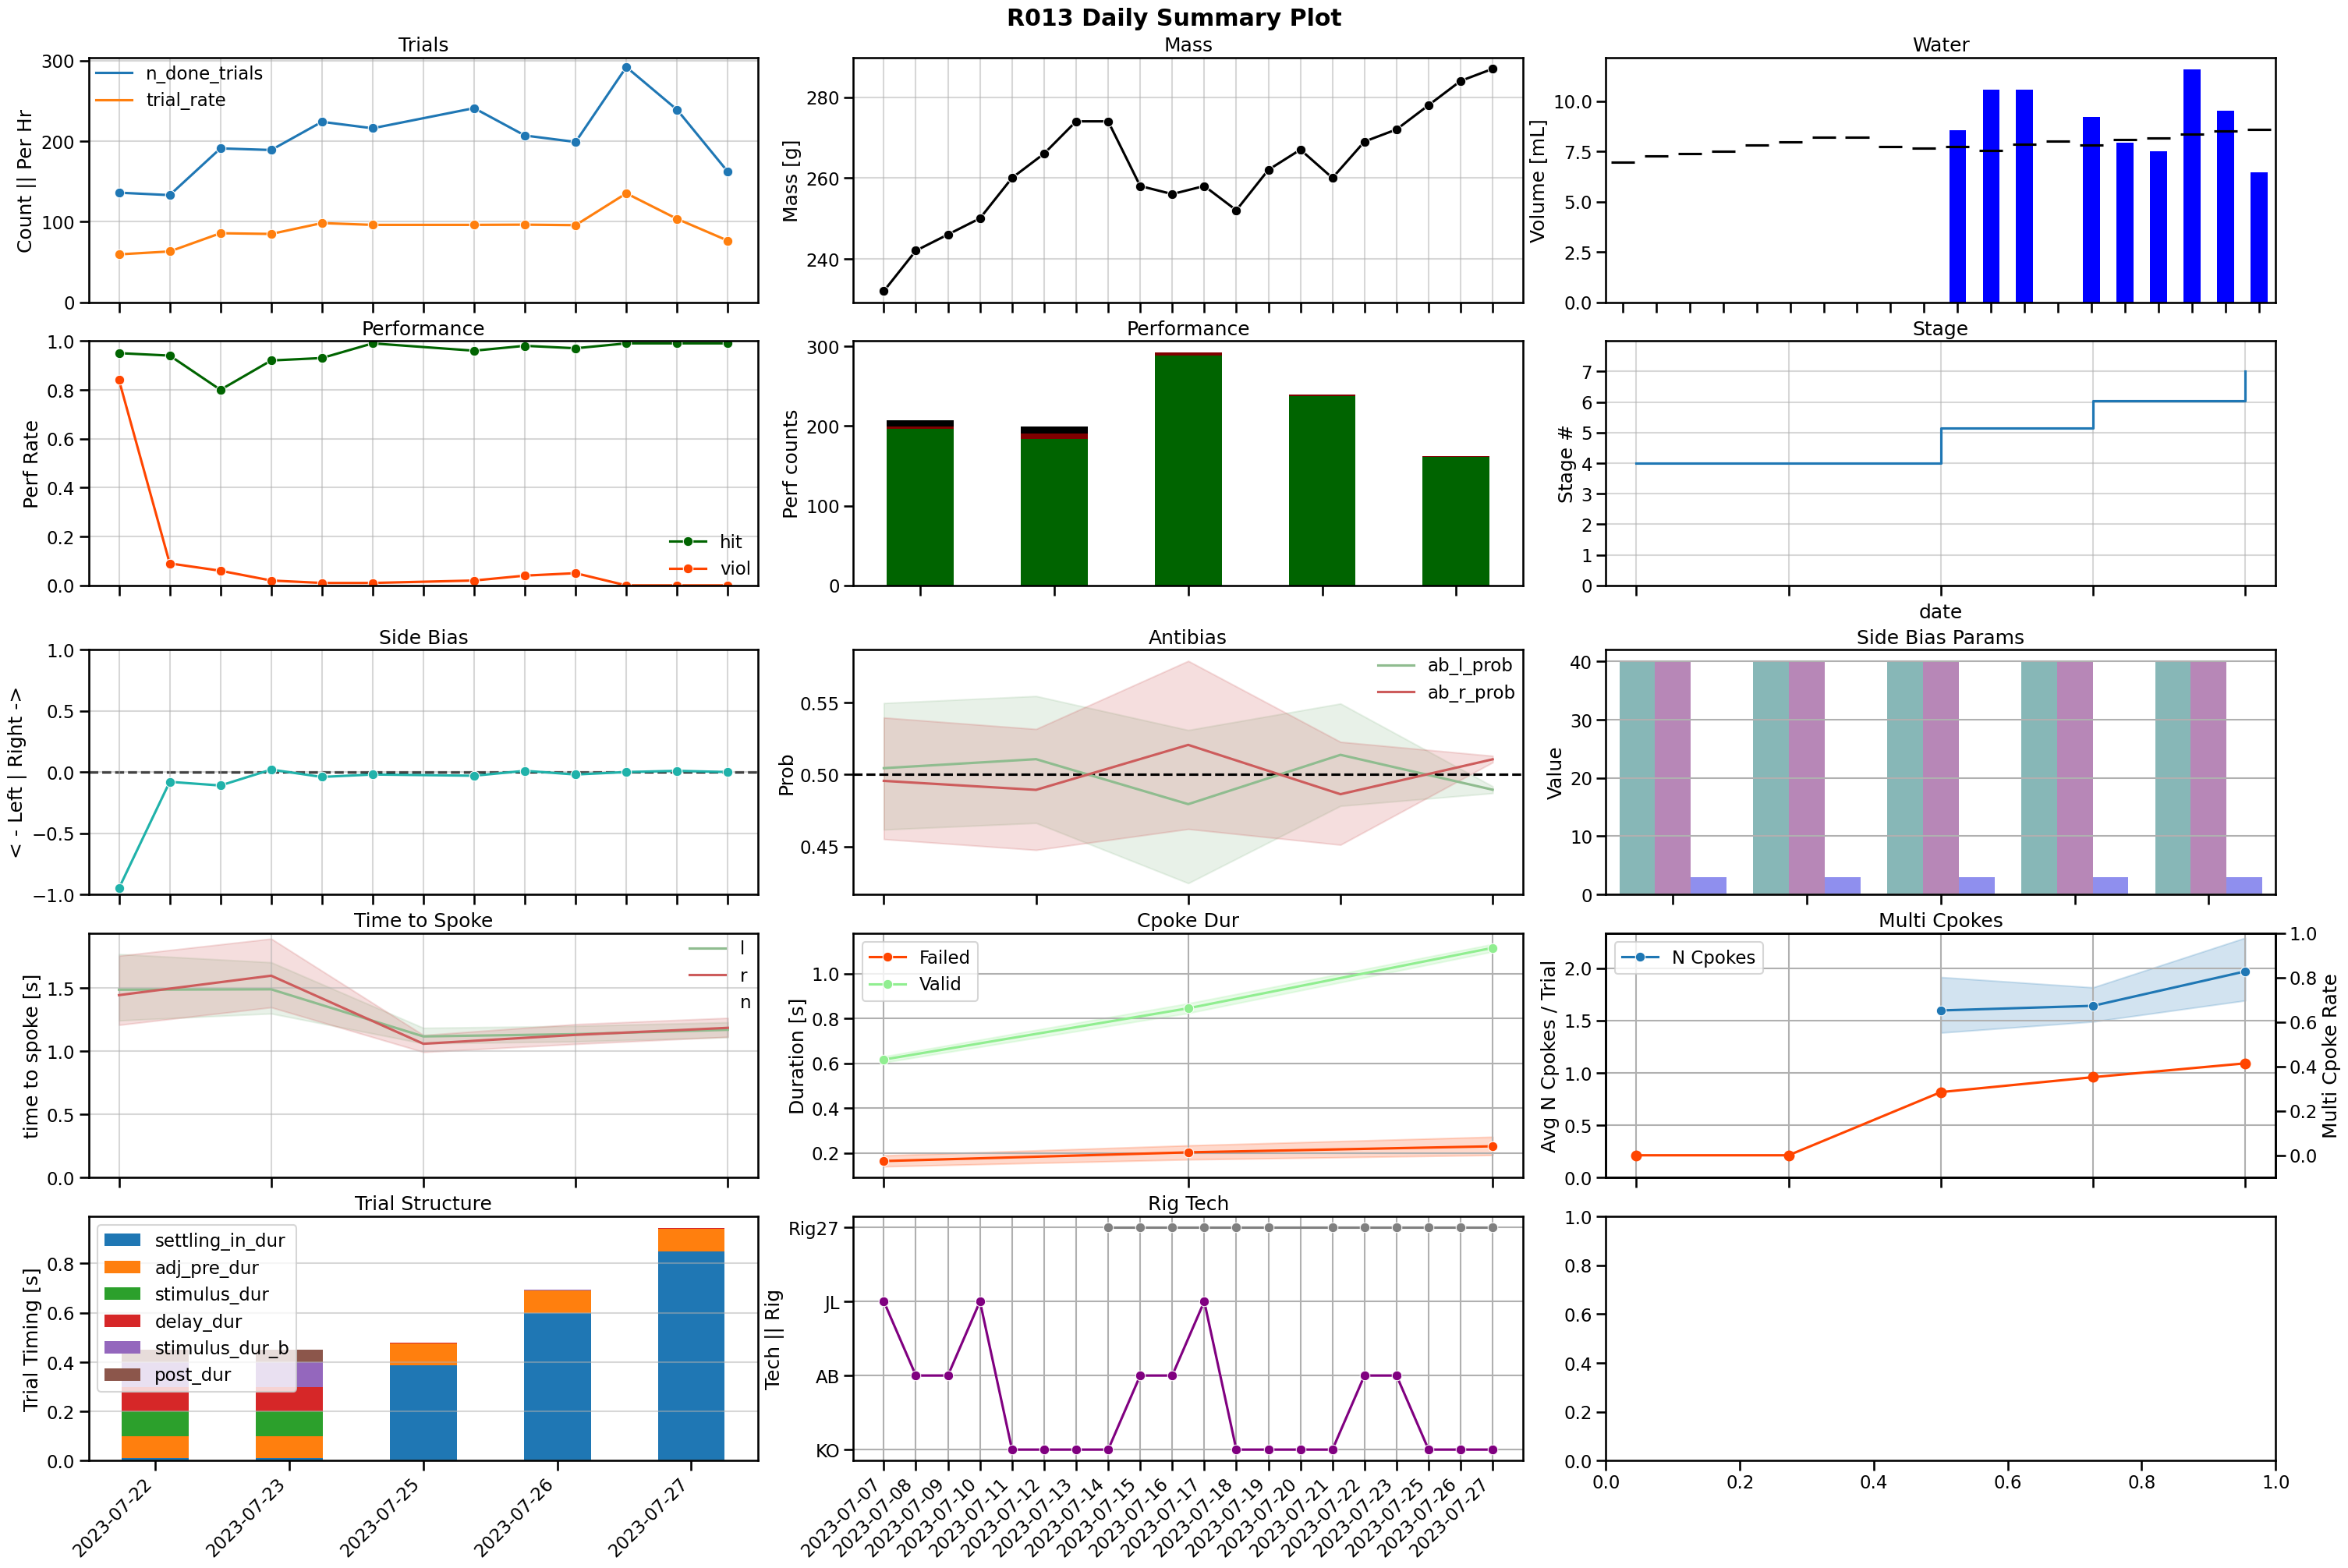

In [44]:
def plot_multiday_summary(animal_id, days_df, trials_df):
    """
    params
    ------
    animal_id : str
        animal id to plot, e.g. "R610"
    days_df : pd.DataFrame
        days dataframe created by create_days_df_from_dj() with 
        day as row index
    trials_df : pd.DataFrame
        trials dataframe created by create_trials_df_from_dj() with
        trial as row index

    """
    layout = """
        AAABBBCCC
        DDDEEEFFF
        GGGHHHIII
        JJJKKKLLL
        MMMNNNOOO
    """
    fig = plt.figure(constrained_layout=True, figsize=(30, 20))
    ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
    plt.suptitle(f"{animal_id} Daily Summary Plot", fontweight="semibold")

    animal_days_df = days_df.query("animal_id == @animal_id").copy()
    animal_trials_df = trials_df.query("animal_id == @animal_id").copy()

    ## ROW 1
    plot_trials(
        animal_days_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False
    )
    plot_mass(animal_days_df, ax_dict["B"], title="Mass", xaxis_label=False)
    plot_water_restriction(
        animal_days_df, ax_dict["C"], title="Water", legend=False, xaxis_label=False
    )

    ## ROW 2
    plot_performance(animal_days_df, ax_dict["D"], title="Performance", xaxis_label=False)
    plot_performance_bars(
        animal_trials_df, ax_dict["E"], title="Performance", xaxis_label=False
    )
    plot_stage(
        animal_trials_df,
        ax_dict["F"],
        title="Stage",
        xaxis_label=False,
    )

    ## ROW 3
    plot_side_bias(animal_days_df, ax_dict["G"], title="Side Bias", xaxis_label=False)
    plot_antibias_probs(animal_trials_df, ax_dict["H"], title="Antibias", xaxis_label=False)
    plot_sidebias_params(
        animal_trials_df, ax_dict["I"], title="Side Bias Params", xaxis_label=False
    )

    ## ROW 4
    plot_time_to_spoke(
        animal_trials_df, ax_dict["J"], title="Time to Spoke", xaxis_label=False
    )
    plot_cpoke_dur_timings_pregnp(
        animal_trials_df, ax_dict["K"], title="Cpoke Dur", xaxis_label=False
    )
    plot_n_cpokes_and_multirate(
        animal_trials_df, ax_dict["L"], title="Multi Cpokes", xaxis_label=False
    )

    ## ROW 5
    plot_trial_structure(
        animal_trials_df, ax_dict["M"], title="Trial Structure", xaxis_label=True
    )
    plot_rig_tech(animal_days_df, ax_dict["N"], title="Rig Tech", xaxis_label=True)

    return None

In [ ]:

## Plot
# left column
plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# right column
plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
plot_water_restriction(
    animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False
)
plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)


In [ ]:
def plot_multiday_summary(animal_id, days_df):
    """
    Plot the summary of the animal's performance over the
    date range in days_df

    params
    ------
    animal_id : str
        animal id to plot, e.g. "R610"
    days_df : pd.DataFrame
        days dataframe created by create_days_df_from_dj()
    """

    layout = """
        AAABBB
        CCCDDD
        EEEFFF
    """
    fig = plt.figure(constrained_layout=True, figsize=(15, 8))
    ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
    plt.suptitle(f"{animal_id} Daily Summary Plot", fontweight="semibold")

    animal_df = days_df.query("animal_id == @animal_id")

    ## Plot
    # left column
    plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
    plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
    plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

    # right column
    plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
    plot_water_restriction(
        animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False
    )
    plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

    return None

TODO: these should shift to be more up to date readins/saves!

In [52]:
# # df.to_csv('df.csv', index=False) # already ran this
df = pd.read_csv('df.csv') # run if needed
r610 = df.query("animal_id == 'R610'")


# days_df = pd.read_csv('summary_df.csv')
days_r610 = days_df.query("animal_id == 'R610'")

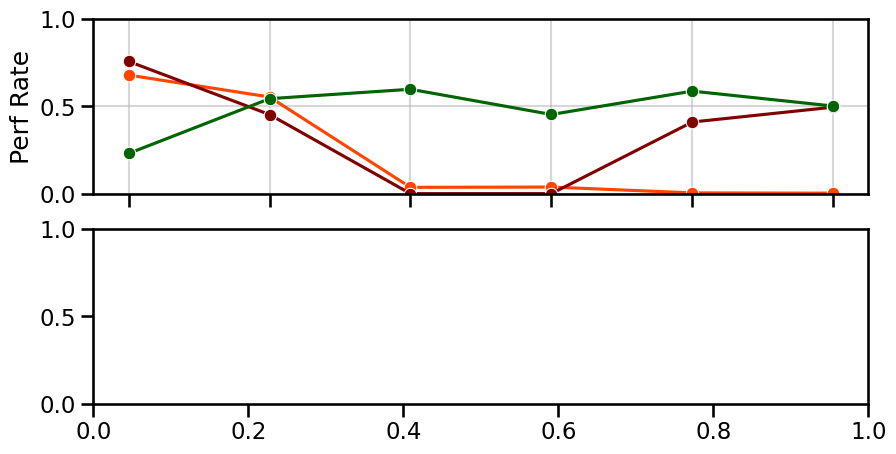

In [5]:
from plot_days_info import plot_performance_w_error, plot_performance
from plotting_utils import *
fig,ax = plt.subplots(2,1, figsize=(10,5))
plot_performance_w_error(r610, ax[0],xaxis_label=False)
# plot_performance(days_r610, ax[1])

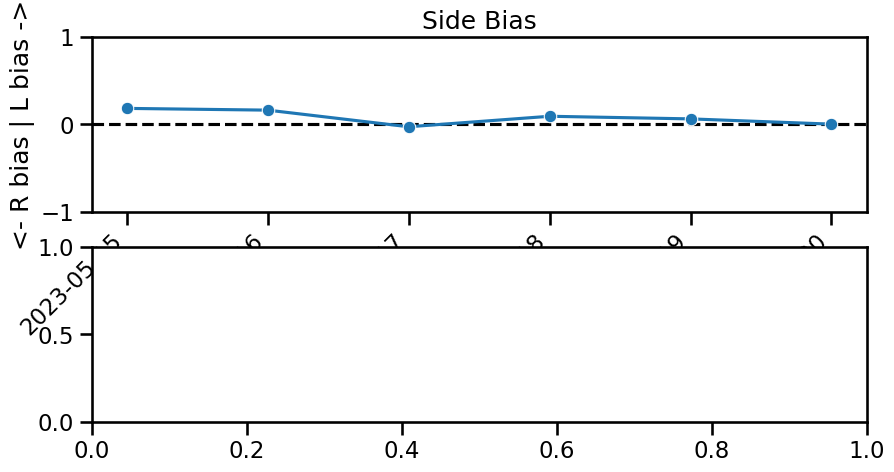

In [6]:
from DMS2_multiday_plots_utils import plot_multiday_side_bias
fig,ax = plt.subplots(2,1, figsize=(10,5))

plot_multiday_side_bias(r610, ax[0])
# plot_side_bias(days_r610, ax[1])

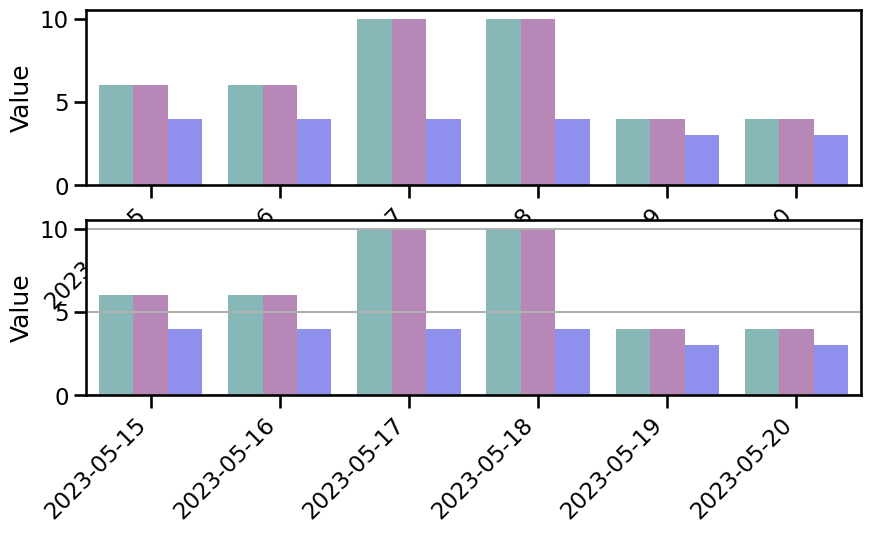

In [9]:
from DMS2_multiday_plots_utils import plot_multiday_sidebias_params
fig,ax = plt.subplots(2,1, figsize=(10,5))

plot_multiday_sidebias_params(r610, ax[0])
plot_sidebias_params(r610, ax[1])


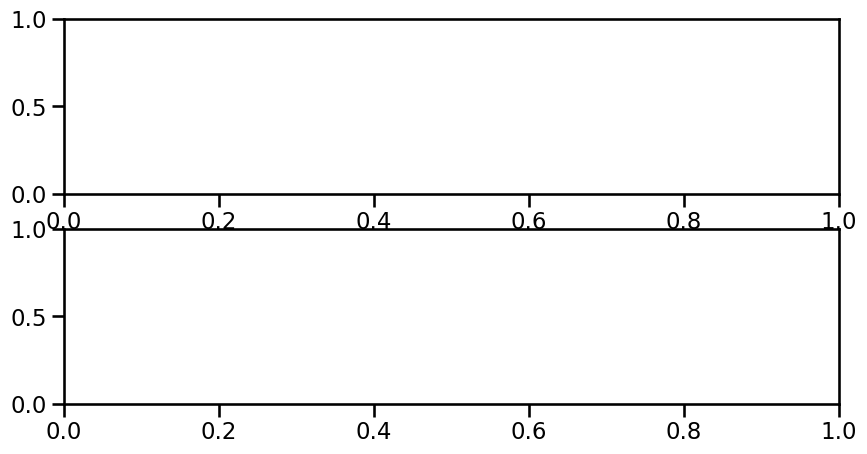

In [12]:
from DMS2_multiday_plots_utils import plot_multiday_time_to_spoke
# TODO read in fresh df
fig,ax = plt.subplots(2,1, figsize=(10,5))

# plot_multiday_time_to_spoke(r610,ax[0])
# plot_time_to_spoke(r610, ax[1])


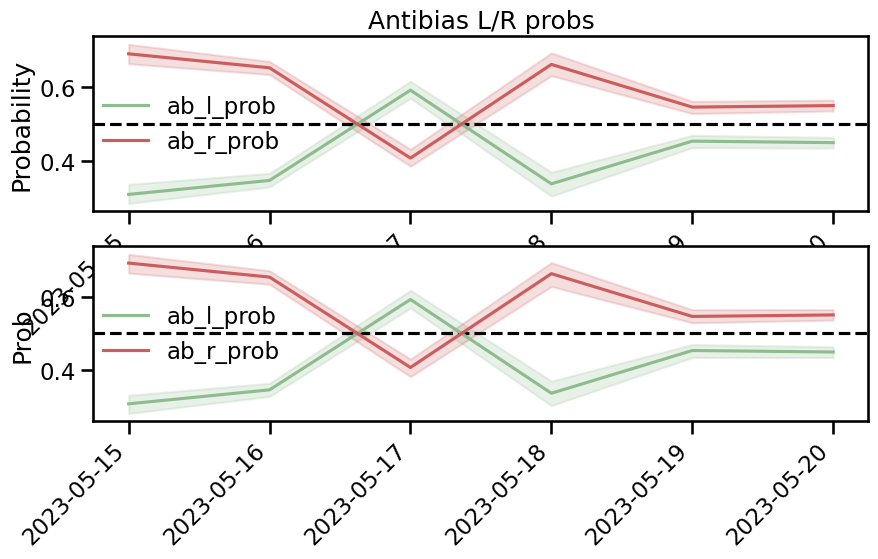

In [16]:
from DMS2_multiday_plots_utils import plot_multiday_antibias_probs
fig,ax = plt.subplots(2,1, figsize=(10,5))

plot_multiday_antibias_probs(r610, ax[0])
plot_antibias_probs(r610, ax[1])



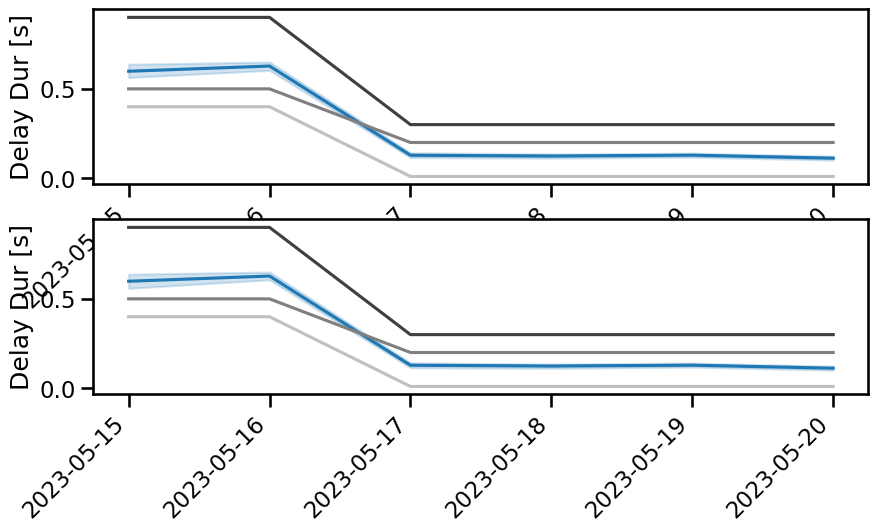

In [19]:
from DMS2_multiday_plots_utils import plot_multiday_delay_params
fig,ax = plt.subplots(2,1, figsize=(10,5))

plot_multiday_delay_params(r610, ax[0])
plot_exp_delay_params(r610, ax[1])



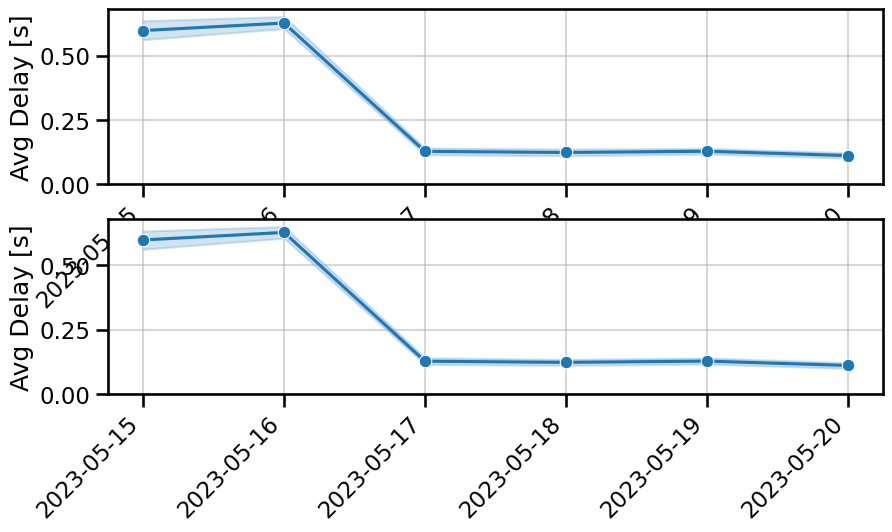

In [24]:
from DMS2_multiday_plots_utils import plot_multiday_avg_delay
fig,ax = plt.subplots(2,1, figsize=(10,5))

plot_multiday_avg_delay(r610, ax[0])
plot_avg_delay(r610, ax[1])



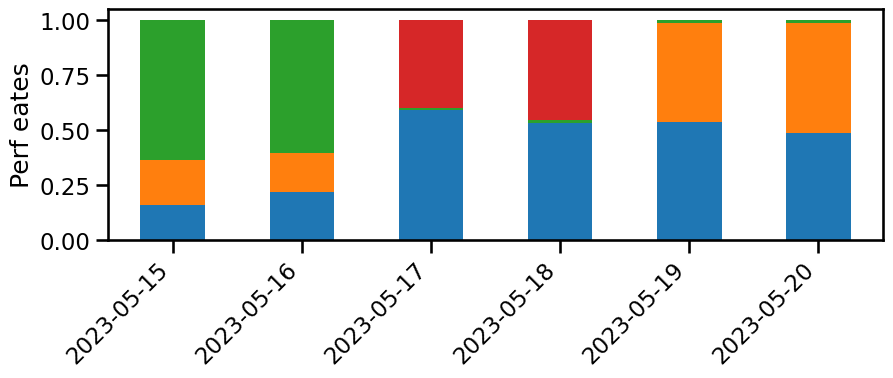

In [29]:
fig,ax = make_fig()

plot_performance_bars(r610, ax, normalize=True)

In [64]:
r610.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 933
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trial                 934 non-null    int64  
 1   animal_id             934 non-null    object 
 2   date                  934 non-null    object 
 3   sess_id               934 non-null    int64  
 4   result                934 non-null    int64  
 5   hits                  777 non-null    float64
 6   violations            934 non-null    int64  
 7   temperror             777 non-null    float64
 8   hit_rate              929 non-null    float64
 9   error_rate            929 non-null    float64
 10  violation_rate        934 non-null    float64
 11  temp_error_rate       929 non-null    float64
 12  n_lpokes              930 non-null    float64
 13  n_cpokes              930 non-null    float64
 14  n_rpokes              930 non-null    float64
 15  trial_dur             930 no

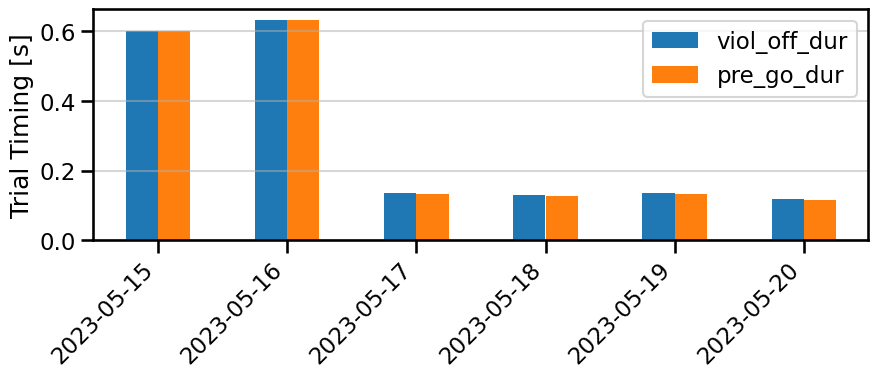

In [99]:
fig,ax = make_fig()

plot_trial_end_timing(r610, ax)

<Axes: xlabel='date'>

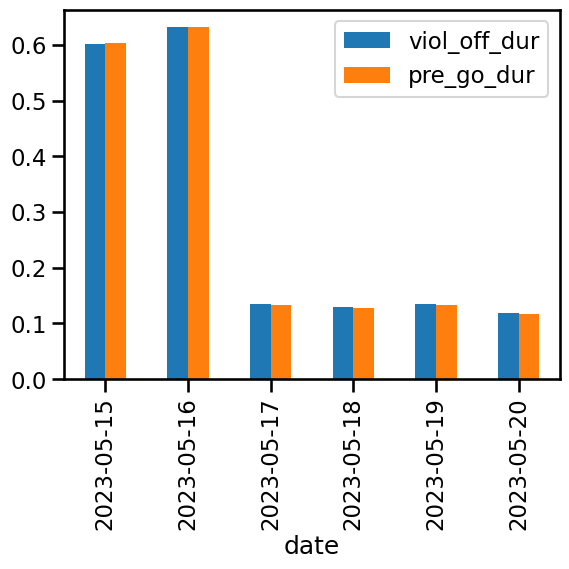

In [84]:
columns_to_plot = ["date","viol_off_dur", "pre_go_dur"]

sub_df = r610[columns_to_plot].groupby('date').mean().reset_index()
sub_df.plot(x="date", kind="bar", stacked=False)
